#                                  Multi Label Clasification - 3D

# Load Data

In [1]:
import pandas as pd
import os

In [2]:

file_name = "diabetes_dataset"
root_folder = f'multi-label-clasification/two-d/{file_name}/' 
os.makedirs(root_folder, exist_ok=True)

df = pd.read_csv('sample_data/'+file_name+'.csv')

#buang kolom tidak dibutuhkan
df.drop(columns=['diagnosed_diabetes'], inplace=True)

print("Sebulum DROP nan : " + str(df.shape) )
df = df.dropna() #Drop Nan
print("Setelah DROP nan : " + str(df.shape) )

Sebulum DROP nan : (100000, 30)
Setelah DROP nan : (100000, 30)


In [3]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,239,41,160,145,136,236,6.36,8.18,29.6,Type 2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,213,66,99,36,118,195,5.07,7.51,44.7,Type 2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,171,50,79,140,139,253,5.28,9.03,38.2,Type 2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,210,52,125,160,137,184,12.74,7.20,23.5,Type 2


#### LabelEncoder

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#labeling
df['label_gender']            = le.fit_transform(df['gender'])
df['label_ethnicity']         = le.fit_transform(df['ethnicity'])
df['label_income_level']      = le.fit_transform(df['income_level'])
df['label_education_level']   = le.fit_transform(df['education_level'])
df['label_employment_status'] = le.fit_transform(df['employment_status'])
df['label_smoking_status']    = le.fit_transform(df['smoking_status'])

In [5]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,6.36,8.18,29.6,Type 2,1,0,2,1,0,2
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,2.00,5.63,23.0,No Diabetes,0,4,3,1,0,1
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,5.07,7.51,44.7,Type 2,1,2,3,1,3,2
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,5.28,9.03,38.2,Type 2,0,1,1,1,1,2
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,12.74,7.20,23.5,Type 2,1,4,3,0,1,2


#### Scaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Contoh: buat dan fit scaler
scaler = MinMaxScaler()
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score'
]

# Dictionary untuk menyimpan hasil transformasi
scaled_data = {}

# Loop untuk setiap kolom
for col in cols:
    scaler = MinMaxScaler()
    df[[col]] = scaler.fit_transform(df[[col]])  # scaling per kolom
    joblib.dump(scaler, os.path.join(root_folder, f'scaler_{col}.pkl'))
    scaled_data[col] = scaler
    print(f"✅ Scaler for '{col}' saved as scaler_{col}.pkl")

print("\nAll individual scalers saved successfully!")

✅ Scaler for 'label_gender' saved as scaler_label_gender.pkl
✅ Scaler for 'label_ethnicity' saved as scaler_label_ethnicity.pkl
✅ Scaler for 'label_income_level' saved as scaler_label_income_level.pkl
✅ Scaler for 'label_education_level' saved as scaler_label_education_level.pkl
✅ Scaler for 'label_employment_status' saved as scaler_label_employment_status.pkl
✅ Scaler for 'label_smoking_status' saved as scaler_label_smoking_status.pkl
✅ Scaler for 'age' saved as scaler_age.pkl
✅ Scaler for 'physical_activity_minutes_per_week' saved as scaler_physical_activity_minutes_per_week.pkl
✅ Scaler for 'diet_score' saved as scaler_diet_score.pkl
✅ Scaler for 'sleep_hours_per_day' saved as scaler_sleep_hours_per_day.pkl
✅ Scaler for 'glucose_postprandial' saved as scaler_glucose_postprandial.pkl
✅ Scaler for 'insulin_level' saved as scaler_insulin_level.pkl
✅ Scaler for 'hba1c' saved as scaler_hba1c.pkl
✅ Scaler for 'diabetes_risk_score' saved as scaler_diabetes_risk_score.pkl

All individual sc

In [7]:
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status
0,0.555556,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,0.258103,0.57,...,0.144275,0.720690,0.417054,Type 2,0.5,0.00,0.50,0.333333,0.000000,1.0
1,0.416667,Female,White,Highschool,Middle,Employed,Former,1,0.171669,0.67,...,0.000000,0.281034,0.314729,No Diabetes,0.0,1.00,0.75,0.333333,0.000000,0.5
2,0.583333,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,0.068427,0.64,...,0.101588,0.605172,0.651163,Type 2,0.5,0.50,0.75,0.333333,1.000000,1.0
3,0.777778,Female,Black,Highschool,Low,Retired,Never,0,0.058824,0.34,...,0.108537,0.867241,0.550388,Type 2,0.0,0.25,0.25,0.333333,0.333333,1.0
4,0.388889,Male,White,Graduate,Middle,Retired,Never,1,0.130852,0.72,...,0.355394,0.551724,0.322481,Type 2,0.5,1.00,0.75,0.000000,0.333333,1.0


#### Mapping label

In [8]:
import json
mapping_dicts = {}

cols = [
    'gender',
    'ethnicity',
    'education_level',
    'income_level',
    'employment_status',
    'smoking_status'
]

for col in cols:
    label_col = f"label_{col}"
    mapping_dicts[col] = dict(zip(df[col], df[label_col]))


with open(root_folder + 'label_mappings.json', 'w') as f:
    json.dump(mapping_dicts, f, indent=2)

rows = []
for col, mapping in mapping_dicts.items():
    for k, v in mapping.items():
        rows.append({'feature': col, 'original_value': k, 'label_value': v})

mapping_table = pd.DataFrame(rows)
print(mapping_table)

              feature original_value  label_value
0              gender           Male     0.500000
1              gender         Female     0.000000
2              gender          Other     1.000000
3           ethnicity          Asian     0.000000
4           ethnicity          White     1.000000
5           ethnicity       Hispanic     0.500000
6           ethnicity          Black     0.250000
7           ethnicity          Other     0.750000
8     education_level     Highschool     0.333333
9     education_level       Graduate     0.000000
10    education_level   Postgraduate     1.000000
11    education_level      No formal     0.666667
12       income_level   Lower-Middle     0.500000
13       income_level         Middle     0.750000
14       income_level            Low     0.250000
15       income_level   Upper-Middle     1.000000
16       income_level           High     0.000000
17  employment_status       Employed     0.000000
18  employment_status     Unemployed     1.000000


#### Select Kolom To Trian

In [9]:
col_target = 'diabetes_stage'
cols = [
    'label_gender', 
    'label_ethnicity', 
    'label_income_level',
    'label_education_level',
    'label_employment_status', 
    'label_smoking_status',
    #--------------------------
    'age',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'glucose_postprandial',
    'insulin_level',
    'hba1c',
    'diabetes_risk_score',
    #------------------------
    col_target
]
df = df[cols].copy()

In [10]:
df.head()

,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage
0,0.5,0.00,0.50,0.333333,0.000000,1.0,0.555556,0.258103,0.57,0.700000,0.764977,0.144275,0.720690,0.417054,Type 2
1,0.0,1.00,0.75,0.333333,0.000000,0.5,0.416667,0.171669,0.67,0.500000,0.368664,0.000000,0.281034,0.314729,No Diabetes
2,0.5,0.50,0.75,0.333333,1.000000,1.0,0.583333,0.068427,0.64,1.000000,0.576037,0.101588,0.605172,0.651163,Type 2
3,0.0,0.25,0.25,0.333333,0.333333,1.0,0.777778,0.058824,0.34,0.514286,0.843318,0.108537,0.867241,0.550388,Type 2
4,0.5,1.00,0.75,0.000000,0.333333,1.0,0.388889,0.130852,0.72,0.628571,0.525346,0.355394,0.551724,0.322481,Type 2


#### cek keseimbangan data

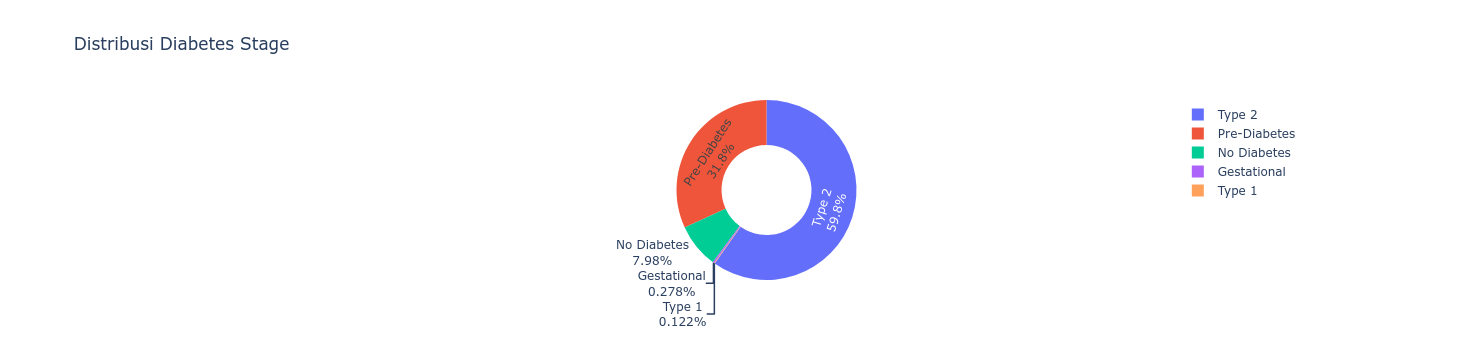

In [11]:
import plotly.express as px

fig = px.pie(
    df,
    names=col_target,
    hole=0.5,  # membuatnya jadi donat
    title='Distribusi Diabetes Stage',
)
fig.update_traces(textinfo='percent+label')
fig.show()

#### Tentukan target -> one-hot encoding

In [12]:
y_counts = df[col_target].value_counts(normalize=True)
labels = list(y_counts.index)

df_y_encoded = pd.get_dummies(df[col_target], prefix='y')

# Pastikan semua nama kolom lowercase dan spasi → underscore
df_y_encoded.columns = (
    df_y_encoded.columns.str.lower()
                        .str.replace(' ', '_')
)

# Gabungkan ke DataFrame utama
df = pd.concat([df.drop(col_target, axis=1), df_y_encoded.astype(int)], axis=1)

In [13]:
df.head()

,label_gender,label_ethnicity,label_income_level,label_education_level,label_employment_status,label_smoking_status,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,y_gestational,y_no_diabetes,y_pre-diabetes,y_type_1,y_type_2
0,0.5,0.00,0.50,0.333333,0.000000,1.0,0.555556,0.258103,0.57,0.700000,0.764977,0.144275,0.720690,0.417054,0,0,0,0,1
1,0.0,1.00,0.75,0.333333,0.000000,0.5,0.416667,0.171669,0.67,0.500000,0.368664,0.000000,0.281034,0.314729,0,1,0,0,0
2,0.5,0.50,0.75,0.333333,1.000000,1.0,0.583333,0.068427,0.64,1.000000,0.576037,0.101588,0.605172,0.651163,0,0,0,0,1
3,0.0,0.25,0.25,0.333333,0.333333,1.0,0.777778,0.058824,0.34,0.514286,0.843318,0.108537,0.867241,0.550388,0,0,0,0,1
4,0.5,1.00,0.75,0.000000,0.333333,1.0,0.388889,0.130852,0.72,0.628571,0.525346,0.355394,0.551724,0.322481,0,0,0,0,1


# Data Load To Train

#### Split data

In [14]:
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Misal df sudah berisi semua data
# Pisahkan fitur dan target
feature_1_cols = ['label_gender','label_smoking_status']
feature_2_cols = ['age','physical_activity_minutes_per_week','diet_score','sleep_hours_per_day']
feature_3_cols = ['glucose_postprandial','insulin_level','hba1c',]

target_cols = [col for col in df.columns if col.startswith('y_')]

# Pisahkan train-test (stratify opsional jika masih punya kolom 'diabetes_stage')
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)


#### DataLoader

In [15]:
from data_set import MultiLabel3DDataset

# Buat dataset dengan class kamu
train_dataset = MultiLabel3DDataset(X_train, feature_1_cols,feature_2_cols,feature_3_cols, target_cols, normalize=False)
test_dataset  = MultiLabel3DDataset(X_test, feature_1_cols,feature_2_cols,feature_3_cols, target_cols, normalize=False)

# Buat DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Cek contoh batch
for X1,X2,X3, y in train_loader:
    print("X1 shape:", X1.shape)
    print("X2 shape:", X2.shape)
    print("X3 shape:", X3.shape)
    print("y shape:", y.shape)
    print(X1[:3])  # contoh fitur
    print(X2[:3])  # contoh fitur
    print(X3[:3])  # contoh fitur
    print(y[:3])  # contoh label
    break

X1 shape: torch.Size([32, 2])
X2 shape: torch.Size([32, 4])
X3 shape: torch.Size([32, 3])
y shape: torch.Size([32, 5])
tensor([[0.5000, 1.0000],
        [0.0000, 1.0000],
        [0.5000, 1.0000]])
tensor([[0.3750, 0.0780, 0.6300, 0.6000],
        [0.4028, 0.0540, 0.4200, 0.7714],
        [0.7917, 0.1128, 0.5700, 0.0857]])
tensor([[0.4009, 0.4758, 0.4517],
        [0.3687, 0.5453, 0.4414],
        [0.5530, 0.0096, 0.5397]])
tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])


# Config

In [16]:
from jcopdl.callback import Callback, set_config

config = set_config({
    "labels"         : labels,
    "threshold"      : 0.5,
    "feature_1_cols" : feature_1_cols,
    "feature_2_cols" : feature_2_cols,
    "feature_3_cols" : feature_3_cols,
    "input_1_dim"    : len(test_dataset.X1[0]),
    "input_2_dim"    : len(test_dataset.X2[0]),
    "input_3_dim"    : len(test_dataset.X3[0]),
    "hidden_1_dims"  : [ 1],
    "hidden_2_dims"  : [ 5,2],
    "hidden_3_dims"  : [ 4,2],
    "combine_dims"   : [4],
    "output_dim"     : len(labels),
    "dropout"        : 0.1,
    "activation"     : "relu",
    "early_stop_patience" : 3,
    "col_target"     : col_target,
})
config

Config(activation=relu, col_target=diabetes_stage, combine_dims=[4], dropout=0.1, early_stop_patience=3, feature_1_cols=['label_gender', 'label_smoking_status'], feature_2_cols=['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day'], feature_3_cols=['glucose_postprandial', 'insulin_level', 'hba1c'], hidden_1_dims=[1], hidden_2_dims=[5, 2], hidden_3_dims=[4, 2], input_1_dim=2, input_2_dim=4, input_3_dim=3, labels=['Type 2', 'Pre-Diabetes', 'No Diabetes', 'Gestational', 'Type 1'], output_dim=5, threshold=0.5)

# MCOC

#### Model - Criterion - Optimizer - Callback

In [17]:
from class_lib import MultiLabel3DClassifier
from torch import optim, nn
from jcopdl.callback import Callback

#Model
model = MultiLabel3DClassifier(
    input_dim_1  = config.input_1_dim, 
    input_dim_2  = config.input_2_dim, 
    input_dim_3  = config.input_3_dim, 
    hidden_dims_1= config.hidden_1_dims,
    hidden_dims_2= config.hidden_2_dims,
    hidden_dims_3= config.hidden_3_dims,
    combined_dims= config.combine_dims,
    output_dim   = config.output_dim,
    dropout=config.dropout, 
    activation=config.activation
).to(device)

#Criterion
criterion = nn.BCELoss()

#Optimizer
optim = optim.AdamW(model.parameters(), lr=0.001)

#Callback
callback = Callback(model, config, outdir=root_folder,early_stop_patience=config.early_stop_patience)

#### Visualisasi Model

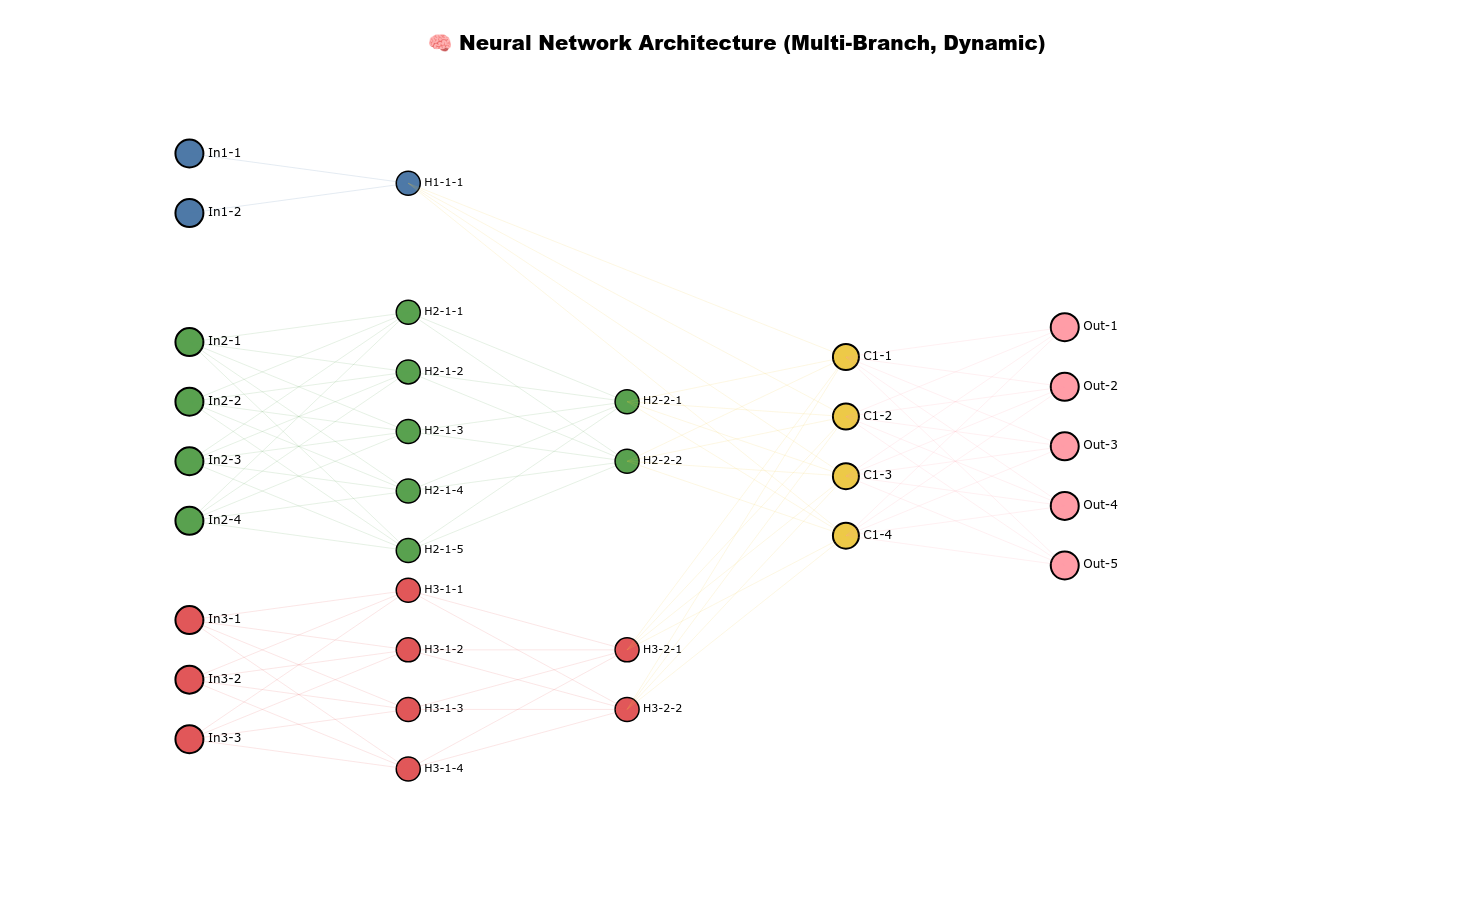

In [18]:
from visualization import plot_dynamic_multi_input_network
plot_dynamic_multi_input_network(
    input_dims=[config.input_1_dim, config.input_2_dim,config.input_3_dim],
    hidden_dims_per_branch=[
        config.hidden_1_dims,
        config.hidden_2_dims,
        config.hidden_3_dims
    ],
    combined_dims=config.combine_dims,
    output_dim=config.output_dim,
    figsize=(1000, 900)
)


# Training


─────────────────────────────────────────────────── 🚀 EPOCH 1 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1874.27it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.3146 │ 0.2107 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.1619 │ 0.1009 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.5106 │ 0.6852 │ │ No Diabetes  │  0.7154  │
│ Micro F1         │ 0.5757 │ 0.7309 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.1948 │ 0.2847 │ │    Type 1    │  0.8621  │
│ Overall Accuracy │ 0.8381 │ 0.8991 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     1
Train_cost  = 0.3146 | Test_cost  = 0.2107 | Train_score = 0.8381 | Test_score = 0.8991 |


─────────────────────────────────────────────────── 🚀 EPOCH 2 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1380.53it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.2116 │ 0.1799 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0984 │ 0.0787 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7109 │ 0.7905 │ │ No Diabetes  │  0.8032  │
│ Micro F1         │ 0.7430 │ 0.8007 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3009 │ 0.3288 │ │    Type 1    │  0.8854  │
│ Overall Accuracy │ 0.9016 │ 0.9213 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     2
Train_cost  = 0.2116 | Test_cost  = 0.1799 | Train_score = 0.9016 | Test_score = 0.9213 |


─────────────────────────────────────────────────── 🚀 EPOCH 3 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1921.76it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1978 │ 0.1755 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0870 │ 0.0757 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7528 │ 0.8016 │ │ No Diabetes  │  0.8101  │
│ Micro F1         │ 0.7758 │ 0.8089 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3173 │ 0.3325 │ │    Type 1    │  0.8933  │
│ Overall Accuracy │ 0.9130 │ 0.9243 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     3
Train_cost  = 0.1978 | Test_cost  = 0.1755 | Train_score = 0.9130 | Test_score = 0.9243 |


─────────────────────────────────────────────────── 🚀 EPOCH 4 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1909.62it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1900 │ 0.1754 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0825 │ 0.0726 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7744 │ 0.8112 │ │ No Diabetes  │  0.8213  │
│ Micro F1         │ 0.7897 │ 0.8171 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3243 │ 0.3369 │ │    Type 1    │  0.8978  │
│ Overall Accuracy │ 0.9175 │ 0.9274 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     4
Train_cost  = 0.1900 | Test_cost  = 0.1754 | Train_score = 0.9175 | Test_score = 0.9274 |


─────────────────────────────────────────────────── 🚀 EPOCH 5 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1915.51it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1875 │ 0.1739 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0796 │ 0.0731 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7879 │ 0.8112 │ │ No Diabetes  │  0.8163  │
│ Micro F1         │ 0.7984 │ 0.8161 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3285 │ 0.3358 │ │    Type 1    │  0.9003  │
│ Overall Accuracy │ 0.9204 │ 0.9269 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     5
Train_cost  = 0.1875 | Test_cost  = 0.1739 | Train_score = 0.9204 | Test_score = 0.9269 |
==> EarlyStop patience =  1 | Best test_score: 0.9274


─────────────────────────────────────────────────── 🚀 EPOCH 6 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1942.36it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1879 │ 0.1777 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0790 │ 0.0716 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7916 │ 0.8153 │ │ No Diabetes  │  0.8202  │
│ Micro F1         │ 0.8004 │ 0.8199 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3296 │ 0.3376 │ │    Type 1    │  0.9038  │
│ Overall Accuracy │ 0.9210 │ 0.9284 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     6
Train_cost  = 0.1879 | Test_cost  = 0.1777 | Train_score = 0.9210 | Test_score = 0.9284 |


─────────────────────────────────────────────────── 🚀 EPOCH 7 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1935.97it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1861 │ 0.1787 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0778 │ 0.0703 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7971 │ 0.8196 │ │ No Diabetes  │  0.8240  │
│ Micro F1         │ 0.8038 │ 0.8235 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3312 │ 0.3394 │ │    Type 1    │  0.9067  │
│ Overall Accuracy │ 0.9222 │ 0.9297 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     7
Train_cost  = 0.1861 | Test_cost  = 0.1787 | Train_score = 0.9222 | Test_score = 0.9297 |


─────────────────────────────────────────────────── 🚀 EPOCH 8 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 2002.08it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1879 │ 0.1809 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0772 │ 0.0703 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.7995 │ 0.8206 │ │ No Diabetes  │  0.8247  │
│ Micro F1         │ 0.8055 │ 0.8236 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3320 │ 0.3396 │ │    Type 1    │  0.9058  │
│ Overall Accuracy │ 0.9228 │ 0.9297 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     8
Train_cost  = 0.1879 | Test_cost  = 0.1809 | Train_score = 0.9228 | Test_score = 0.9297 |
==> EarlyStop patience =  1 | Best test_score: 0.9297


─────────────────────────────────────────────────── 🚀 EPOCH 9 ────────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1957.51it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1904 │ 0.1866 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0770 │ 0.0701 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.8016 │ 0.8209 │ │ No Diabetes  │  0.8280  │
│ Micro F1         │ 0.8063 │ 0.8241 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3325 │ 0.3402 │ │    Type 1    │  0.9036  │
│ Overall Accuracy │ 0.9230 │ 0.9299 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch     9
Train_cost  = 0.1904 | Test_cost  = 0.1866 | Train_score = 0.9230 | Test_score = 0.9299 |


─────────────────────────────────────────────────── 🚀 EPOCH 10 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1982.76it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1894 │ 0.1883 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0767 │ 0.0729 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.8019 │ 0.8135 │ │ No Diabetes  │  0.8178  │
│ Micro F1         │ 0.8069 │ 0.8170 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3327 │ 0.3362 │ │    Type 1    │  0.8999  │
│ Overall Accuracy │ 0.9233 │ 0.9271 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    10
Train_cost  = 0.1894 | Test_cost  = 0.1883 | Train_score = 0.9233 | Test_score = 0.9271 |
==> EarlyStop patience =  1 | Best test_score: 0.9299


─────────────────────────────────────────────────── 🚀 EPOCH 11 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 2056.08it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1891 │ 0.1869 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0763 │ 0.0706 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.8038 │ 0.8199 │ │ No Diabetes  │  0.8234  │
│ Micro F1         │ 0.8082 │ 0.8229 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3333 │ 0.3391 │ │    Type 1    │  0.9059  │
│ Overall Accuracy │ 0.9237 │ 0.9294 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    11
Train_cost  = 0.1891 | Test_cost  = 0.1869 | Train_score = 0.9237 | Test_score = 0.9294 |
==> EarlyStop patience =  2 | Best test_score: 0.9299


─────────────────────────────────────────────────── 🚀 EPOCH 12 ───────────────────────────────────────────────────

test: 100%|██████████| 625/625 [00:00<00:00, 1913.78it/s]


              📊 Summary                  🎯 Per-Label Accuracy   
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Metric           ┃  Train ┃   Test ┃ ┃    Label     ┃ Accuracy ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ Loss             │ 0.1905 │ 0.1870 │ │    Type 2    │  0.9971  │
│ Hamming Loss     │ 0.0761 │ 0.0712 │ │ Pre-Diabetes │  0.9220  │
│ Subset Accuracy  │ 0.8050 │ 0.8189 │ │ No Diabetes  │  0.8218  │
│ Micro F1         │ 0.8089 │ 0.8214 │ │ Gestational  │  0.9988  │
│ Macro F1         │ 0.3336 │ 0.3384 │ │    Type 1    │  0.9042  │
│ Overall Accuracy │ 0.9239 │ 0.9288 │ └──────────────┴──────────┘
└──────────────────┴────────┴────────┘


Epoch    12
Train_cost  = 0.1905 | Test_cost  = 0.1870 | Train_score = 0.9239 | Test_score = 0.9288 |
==> EarlyStop patience =  3 | Best test_score: 0.9299
==> Execute Early Stopping at epoch: 12 | Best test_score: 0.9299
==> Best model is saved at multi-label-clasification/two-d/diabetes_dataset/


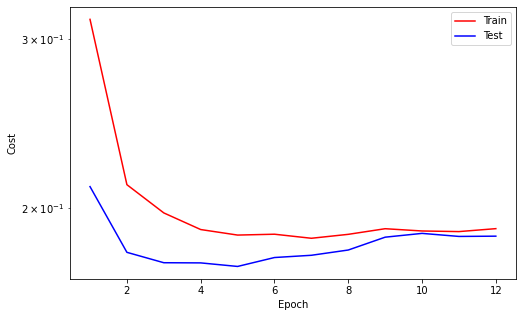

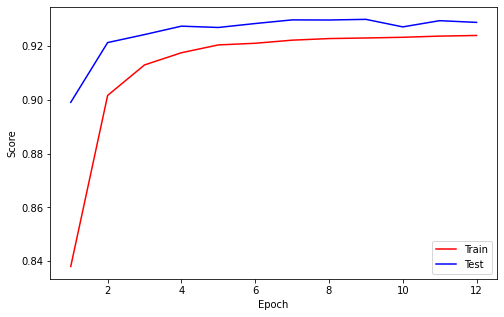

⏹️ Training dihentikan oleh early stopping.

In [19]:
from train_and_evaluate import train_and_evaluate_multi_label

train_and_evaluate_multi_label(
    model=model,
    train_dataset=train_dataset,
    test_dataset=test_dataset,
    train_loader=train_loader,
    test_loader=test_loader,
    criterion=criterion,
    optim=optim,
    config=config,
    device=device,
    labels=labels,          
    callback=callback,
    dimension='3d'
)

# Evaluate

In [20]:
from evaluate import evaluate_multi_label

hsl = evaluate_multi_label(model, test_loader, target_cols,criterion, device, config.threshold, dimension='3d')

       📊 Evaluasi Model            🎯 Per-Label Accuracy    
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Metrik              ┃  Nilai ┃ ┃     Label      ┃ Akurasi ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ 🔹 Overall Accuracy │ 0.9299 │ │ y_gestational  │ 0.9971  │
│ ✅ Subset  Accuracy │ 0.8209 │ │ y_no_diabetes  │ 0.9220  │
│ 💥 Loss (avg)       │ 0.1866 │ │ y_pre-diabetes │ 0.8280  │
│ 📉 Hamming Loss     │ 0.0701 │ │    y_type_1    │ 0.9988  │
│ ⚖️  Micro F1-score   │ 0.8241 │ │    y_type_2    │ 0.9036  │
│ 📈 Macro F1-score   │ 0.3402 │ └────────────────┴─────────┘
└─────────────────────┴────────┘

In [21]:
hsl['df'].head(100)

,Target,Prediksi,Benar (%)
0,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",60.0
1,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",100.0
2,"[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",100.0
3,"[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",100.0
4,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",60.0
...,...,...,...
95,"[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",100.0
96,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",100.0
97,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",100.0
98,"[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]",100.0


# Pengaplikasian

In [22]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension

In [23]:
import torch, json
from torch import optim, nn
from class_lib import MultiLabel3DClassifier
import joblib
import pandas as pd


# Load Config
config = torch.load(root_folder + "configs.pth", map_location="cpu", weights_only=False)
#config = torch.load(root_folder + "configs.pth", map_location="cpu")

#Load Weights
weights= torch.load(root_folder + "weights_best.pth", map_location="cpu")

#Load Label Mapping
with open(root_folder + "label_mappings.json", "r") as f:
    label_mapping = json.load(f)


model = MultiLabel3DClassifier(
    input_dim_1  = config.input_1_dim, 
    input_dim_2  = config.input_2_dim, 
    input_dim_3  = config.input_3_dim, 
    hidden_dims_1= config.hidden_1_dims,
    hidden_dims_2= config.hidden_2_dims,
    hidden_dims_3= config.hidden_3_dims,
    combined_dims= config.combine_dims,
    output_dim   = config.output_dim,
    dropout=config.dropout, 
    activation=config.activation
)
model.load_state_dict(weights)
model.eval() 

MultiLabel3DClassifier(
  (net1): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
  )
  (net2): Sequential(
    (0): Linear(in_features=4, out_features=5, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=5, out_features=2, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (net3): Sequential(
    (0): Linear(in_features=3, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=4, out_features=2, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
  )
  (net_combined): Sequential(
    (0): Linear(in_features=5, out_features=4, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=4, out_features=5, bias=True)
    (4): Sigmoid()
  )
)

In [24]:
from aplokator import MultiLabelPredictor
predictor = MultiLabelPredictor(
    model=model,
    config=config,
    label_mapping=label_mapping,
    scaler_folder=root_folder,
    dimension='3d'
)

HTML(value='\n        <style>\n        .minimal-container { background: #f8f9fa; padding: 12px; border-radius:…